# Préparation du dataset

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob
from skimage import io

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

tf.config.experimental_run_functions_eagerly(True)
#tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
liste_file = []

try:
        from google.colab import drive
        drive.mount('/content/drive', force_remount=True)
        files = os.listdir("/content/drive/MyDrive/Notebooks/P6/Dataset/Images")
        path ="/content/drive/MyDrive/Notebooks/P6/Dataset/Images/"
        data_T =  pd.read_csv("/content/drive/MyDrive/Notebooks/P6/basep6.csv")

except ModuleNotFoundError : 
        files = os.listdir(r'C:\Users\Hugues\gdrive\Notebooks\P6\Dataset\Images')
        path ="C:\\Users\\Hugues\\gdrive\\Notebooks\\P6\\Dataset\\Images\\"
        data_T =  pd.read_csv("C:\\Users\\Hugues\\gdrive\\Notebooks\\P6\\basep6.csv")

for file in files:
    try:
        from google.colab import drive
        imgfile = "/content/drive/MyDrive/Notebooks/P6/Dataset/Images/"+file
        liste_file.append ( file)
        
    except ModuleNotFoundError :
        imgfile  = "C:\\Users\\Hugues\\gdrive\\Notebooks\\P6\\Dataset\\Images\\"+file
        liste_file.append ( file)




print (len(liste_file))


1053


In [ ]:
print (path) 

C:\Users\Hugues\gdrive\Notebooks\P6\Dataset\Images\


In [ ]:
data_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0.1                       1050 non-null   int64 
 1   Unnamed: 0                         1050 non-null   int64 
 2   uniq_id                            1050 non-null   object
 3   crawl_timestamp                    1050 non-null   object
 4   product_url                        1050 non-null   object
 5   product_name                       1050 non-null   object
 6   product_category_tree              1050 non-null   object
 7   pid                                1050 non-null   object
 8   retail_price                       1050 non-null   object
 9   discounted_price                   1050 non-null   object
 10  image                              1050 non-null   object
 11  is_FK_Advantage_product            1050 non-null   bool  
 12  descri

## Création des labels des photos à partir des category

In [ ]:
#data=data_T.sample(100)
data=data_T

In [ ]:
data.groupby("category").count()

,Unnamed: 0.1,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,...,product_name_length_bow,product_name_length_dl,product_category_tree_length_bow,product_category_tree_length_dl,description_length_bow,description_length_dl,product_specifications_length_bow,product_specifications_length_dl,toute_info,toute_info_dl
category,,,,,,,,,,,,,,,,,,,,,
BabyCare,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
BeautyandPersonalCare,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
Computers,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
HomeDecor&FestiveNeeds,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
HomeFurnishing,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
Kitchen&Dining,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
Watches,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150


In [ ]:
list_labels= data['category'].unique().tolist()

In [ ]:
data["label"] = [list_labels.index(l) for l in data["category"]]

In [ ]:
data[["label","category"]].sample(n = 20).sort_values('label')

,label,category
932,0,HomeFurnishing
34,0,HomeFurnishing
751,0,HomeFurnishing
120,0,HomeFurnishing
983,1,BabyCare
494,2,Watches
542,2,Watches
309,3,HomeDecor&FestiveNeeds
974,3,HomeDecor&FestiveNeeds
628,4,Kitchen&Dining


# exemple image par categorie

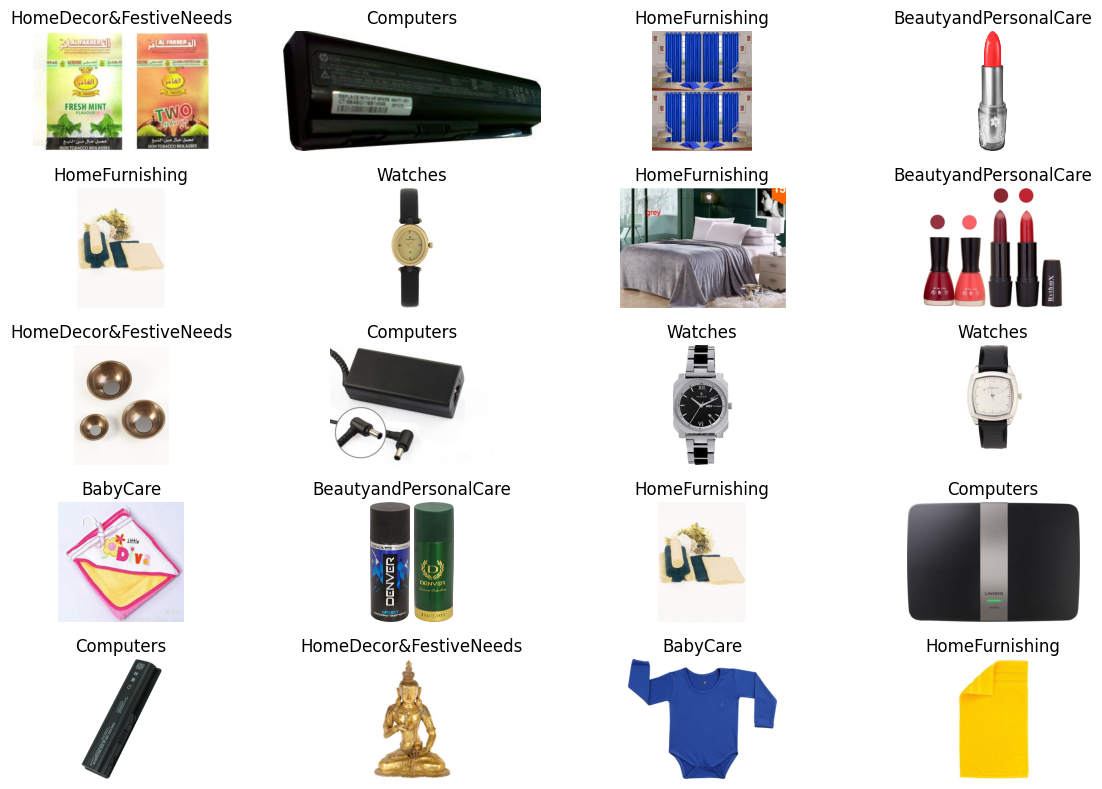

In [ ]:
random = [np.random.randint(0, data.shape[0]) for i in range(20)]
fig = plt.figure(figsize=(12, 8))
    
for i in range(20) :
        idx = random[i]
        #print (data.iloc[idx]['category'])
        filename = path+data.iloc[idx]['image']
        ax= plt.subplot(5, 4, i+1)
        image = io.imread(filename)
        #img = Image.open(os.path.join(path, image_name))
        plt.imshow(image)
        plt.axis('off')
        plt.title(data.iloc[idx]['category'])
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()

plt.show()

# descripteur SIFT

In [ ]:
import cv2

In [ ]:
nb =54

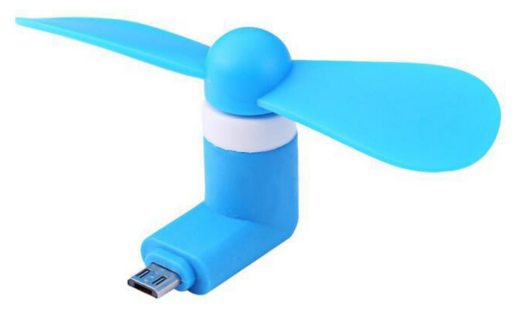

In [ ]:
filename = path+data.iloc[nb]['image']
image = io.imread(filename)

plt.imshow(image)
plt.axis('off')
plt.show()



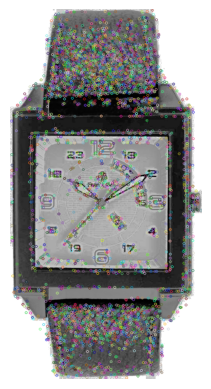

Descripteurs :  (4689, 128)

[[180.   0.   0. ...   0.   0.   0.]
 [202.  52.   0. ...   0.   0.   0.]
 [175.   4.   0. ...   0.  12.  13.]
 ...
 [ 36.  13.   1. ...   0.   0.   3.]
 [  0.  69. 113. ...   7.  19.   8.]
 [ 80.  14.   2. ...   0.  14.  12.]]


In [ ]:
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
filename = path+data.iloc[nb]['image']
#image = io.imread(filename)
image = cv2.imread(filename) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grays
gray_eq = cv2.equalizeHist(gray)   # equalize image histogram
kp, des = sift.detectAndCompute(gray_eq, None)
img=cv2.drawKeypoints(gray_eq,kp,gray_eq)
plt.imshow(img)
plt.axis('off')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

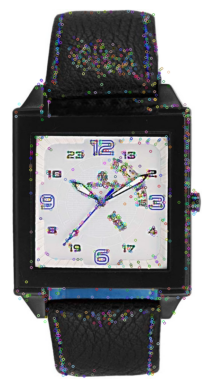

Descripteurs :  (1694, 128)

[[  0. 158.  60. ...   0.   0.   0.]
 [ 17.  22.   5. ...   5.  37.   0.]
 [ 92.  17.   0. ...  65.  22.   1.]
 ...
 [  0.  47. 131. ...   1.   1.   0.]
 [ 73.  57.   4. ...   0.  39.  89.]
 [  9.  14.  24. ...   0.   0. 126.]]


In [ ]:
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
filename = path+data.iloc[nb]['image']
#image = io.imread(filename)
image = cv2.imread(filename) 
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grays
#gray_eq = cv2.equalizeHist(gray)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.axis('off')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

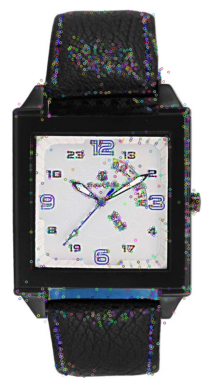

Descripteurs :  (1694, 128)

[[  0. 158.  60. ...   0.   0.   0.]
 [ 17.  22.   5. ...   5.  37.   0.]
 [ 92.  17.   0. ...  65.  22.   1.]
 ...
 [  0.  47. 131. ...   1.   1.   0.]
 [ 73.  57.   4. ...   0.  39.  89.]
 [  9.  14.  24. ...   0.   0. 126.]]


In [ ]:
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
filename = path+data.iloc[nb]['image']
#image = io.imread(filename)
image = cv2.imread(filename)
#image = cv2.imread(path+list_photos[1],0) # convert in gray
#image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.axis('off')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

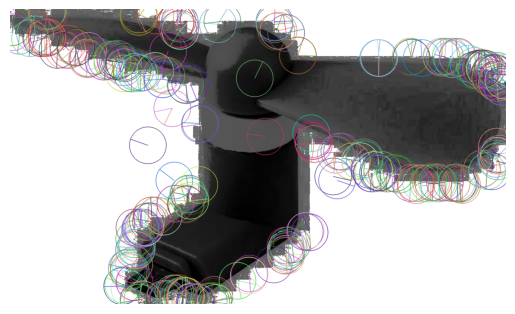

Descripteurs :  (358, 128)

[[  2.   8.   5. ...  68.   9.   3.]
 [122.  34.   6. ...  11.   0.   0.]
 [ 27.  12.   7. ...   0.   0.   1.]
 ...
 [ 41.  32.   2. ...  44. 136.  53.]
 [ 31.  12.   5. ...   0.   0.   2.]
 [103.   0.   0. ...   0.   0.   1.]]


In [ ]:
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create(contrastThreshold=0.2, nOctaveLayers=10)

filename = path+data.iloc[nb]['image']
#image = io.imread(filename)
image = cv2.imread(filename) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grays
gray_eq = cv2.equalizeHist(gray)   # equalize image histogram
kp, des = sift.detectAndCompute(gray_eq, None)
for point in kp:
    point.size = 100
img = cv2.drawKeypoints(gray_eq, kp, gray_eq, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


#img=cv2.drawKeypoints(gray_eq,kp,gray_eq)
plt.imshow(img)
plt.axis('off')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)